In [3]:
print("hii")

hii


In [4]:
#install important labirires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#install KNR DTR RFR Adaboost R SVR LR Ridge Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [ ]:
#install catboost
!pip install catboost

^C


  Using cached catboost-1.2.7.tar.gz (71.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [133 lines of output]
        Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
        Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
        Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
        Using cached conan-1.66.0.tar.gz (789 kB)
        Preparing metadata (setup.py): started
        Preparing metadata (setup.py): finished with status 'done'
        Using cached ipython-8.32.0-py3-none-any.whl.metadata (5.0 kB)
        Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
        Using cached tornado-6.4.2-cp38-abi3-win_amd64.whl.metadata (2.6 kB)
        Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
        Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
        Using cached jupyter_server-2.15.0-py3-none-any.whl.metadata (8.4 kB)
       

In [ ]:
#install randomized searchcv cat boost regression XGR Regression
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [7]:
import warnings

In [8]:
df= pd.read_csv('Data/StudentsPerformance.csv')

In [9]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
#math score is dependent data
y = df['math score']

In [ ]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [ ]:
x = df.drop(columns=['math score'])

In [ ]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [ ]:
#creat column tree trype of transformer
from sklearn.compose import ColumnTransformer
#import the one hot standardscale
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
#numeric and categorical feature
num_feature = x.select_dtypes(exclude='object').columns
cat_feature = x.select_dtypes(include='object').columns
#fit transformation
preprocessor = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder( handle_unknown='ignore'), cat_feature),
    ('standard_scaler', StandardScaler(), num_feature)
])


In [ ]:
x=preprocessor.fit_transform(x)



In [ ]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [ ]:
x.shape

(1000, 19)

In [ ]:
#split into trauin and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
#ccreate evalute function
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'adaBoostRegressor':AdaBoostRegressor(),
    'SVR':SVR(),
    # 'CatBoostRegressor':CatBoostRegressor(verbose=False),
    # 'XGBRegressor':XGBRegressor()
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    model_list.append(list(models.keys())[i])
    print(list(models.keys())[i])
    r2_list.append(model_test_r2)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print('='*35)
    print('\n')


LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3535
- Mean Absolute Error: 4.2423
- R2 Score: 0.8824
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3313
- Mean Absolute Error: 4.2908
- R2 Score: 0.8559


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5659
- Mean Absolute Error: 5.2014
- R2 Score: 0.8230
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.8839
- Mean Absolute Error: 4.6271
- R2 Score: 0.8244


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3538
- Mean Absolute Error: 4.2426
- R2 Score: 0.8823
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3276
- Mean Absolute Error: 4.2858
- R2 Score: 0.8561


KNeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 5.8719
- Mean Absolute Error: 4.6809
- R2 Score: 0.8585
--------------------------

In [ ]:
#display all the value of r_2scaore of different model
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.856059
0,LinearRegression,0.855858
1,Lasso,0.824431
6,adaBoostRegressor,0.813520
5,RandomForestRegressor,0.808322
7,SVR,0.790984
3,KNeighborsRegressor,0.758462
4,DecisionTreeRegressor,0.665110


In [ ]:
#same for accuracy od =f model
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.856059
0,LinearRegression,0.855858
1,Lasso,0.824431
6,adaBoostRegressor,0.813520
5,RandomForestRegressor,0.808322
7,SVR,0.790984
3,KNeighborsRegressor,0.758462
4,DecisionTreeRegressor,0.665110


In [ ]:
#linear regression
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("R2 score of the model is %.2f" %score)
#

R2 score of the model is 85.59


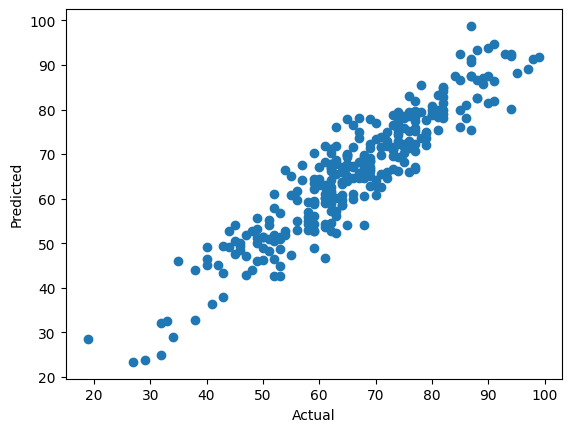

In [ ]:
#plot prediction
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
#difference between the actual and prediction
pred_diff=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_diff

,Actual value,Predicted value,Difference
545,78,85.443718,-7.443718
298,40,49.182153,-9.182153
109,70,64.118669,5.881331
837,75,68.294034,6.705966
194,69,72.158572,-3.158572
...,...,...,...
847,64,58.573034,5.426966
682,62,62.712889,-0.712889
884,51,50.837658,0.162342
325,82,84.977418,-2.977418


In [12]:
df.shape

(1000, 8)